#Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("All libraries loaded successfully!")

All libraries loaded successfully!


#Loading the Dataset

In [3]:
df = pd.read_csv('Sales_Transactions_3500 (2).csv')

print("Data loaded successfully!")
print(f"Total records: {len(df)}")
print(f"\nFirst few rows:")
df.head()

Data loaded successfully!
Total records: 3500

First few rows:


,OrderID,CustomerID,Gender,Age,Product,Category,Quantity,Price,TotalAmount,PaymentMethod,Region,PurchaseDate
0,O00001,C0435,Female,59.0,T-shirt,Fashion,1,369.82,369.82,MobileMoney,East,2025-03-30
1,O00002,C1337,Female,19.0,Jacket,Fashion,2,232.29,464.58,BankTransfer,North,2025-04-11
2,O00003,C0619,Male,28.0,Lipstick,Beauty,1,347.79,347.79,Cash,East,2024-07-14
3,O00004,C0033,Female,58.0,Vacuum Cleaner,Home,5,336.92,1684.60,Card,North,2024-05-24
4,O00005,C1199,Male,25.0,Smartphone,Electronics,1,85.37,85.37,MobileMoney,South,2025-05-10


#Revenue Distributed Across Regions

In [14]:
print("Revenue by Region")
revenue_by_region = df.groupby('Region')['TotalAmount'].sum()
revenue_by_region

Revenue by Region


,TotalAmount
Region,
East,652270.37
North,641732.68
South,647359.17
West,668785.33


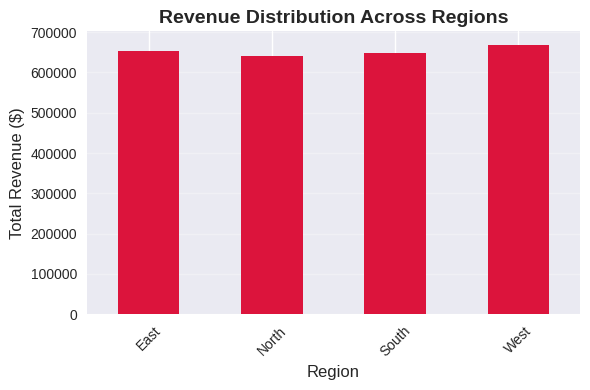

In [30]:
plt.figure(figsize=(6, 4))
revenue_by_region.plot(kind='bar', color='crimson')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.title('Revenue Distribution Across Regions', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [18]:
revenue_sorted = revenue_by_region.sort_values(ascending=False)
print("\n--- Revenue Ranked (Highest to Lowest) ---")
print(revenue_sorted)

print(f"\nHighest: {revenue_sorted.index[0]} with ${revenue_sorted.iloc[0]:,.2f}")
print(f"Lowest: {revenue_sorted.index[-1]} with ${revenue_sorted.iloc[-1]:,.2f}")
print(f"Difference: ${revenue_sorted.iloc[0] - revenue_sorted.iloc[-1]:,.2f}")


--- Revenue Ranked (Highest to Lowest) ---
Region
West     668785.33
East     652270.37
South    647359.17
North    641732.68
Name: TotalAmount, dtype: float64

Highest: West with $668,785.33
Lowest: North with $641,732.68
Difference: $27,052.65



Revenue Percentage by Region

East: 24.99% ($652,270.37)
North: 24.59% ($641,732.68)
South: 24.8% ($647,359.17)
West: 25.62% ($668,785.33)



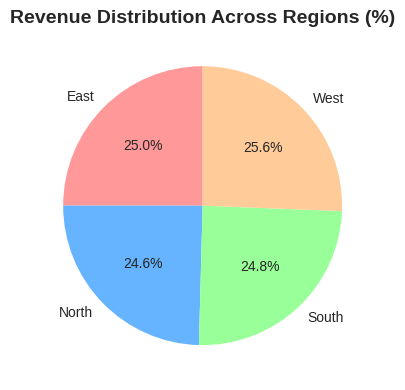

In [29]:
total_revenue = df['TotalAmount'].sum()
revenue_percentage = (revenue_by_region / total_revenue * 100).round(2)

print("\nRevenue Percentage by Region")
print()
for region in revenue_percentage.index:
   print(f"{region}: {revenue_percentage[region]}% (${revenue_by_region[region]:,.2f})")

print()

plt.figure(figsize=(6, 4))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
plt.pie(revenue_by_region, labels=revenue_by_region.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
plt.title('Revenue Distribution Across Regions (%)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

#Observations Based on Analysis

In [33]:
print("="*60)
print("OBSERVATIONS & DISCUSSION")
print("="*60)

print("\n1. REVENUE DISTRIBUTION:")
print("   Region West has the highest revenue at $668785.33 which takes 25.6% of the entire revenue.")
print("   Region North is the lowest performing at $ 641732.68, taking up 24.6% of the revenue.")

print("\n2. PERCENTAGE CONTRIBUTION:")
print("   The revenue is evenly distributed as there are no big margins between the regions.")
print("   West-25.6%; East-25%; South-24.8%; and North-24.6%")

print("\n3. REGIONAL GAPS:")
print("   The difference between highest(West) and lowest(North] is $27,052.65")
print("   This is a relatively small difference in revenues between the highest and the lowest.")

print("="*60)

OBSERVATIONS & DISCUSSION

1. REVENUE DISTRIBUTION:
   Region West has the highest revenue at $668785.33 which takes 25.6% of the entire revenue.
   Region North is the lowest performing at $ 641732.68, taking up 24.6% of the revenue.

2. PERCENTAGE CONTRIBUTION:
   The revenue is evenly distributed as there are no big margins between the regions.
   West-25.6%; East-25%; South-24.8%; and North-24.6%

3. REGIONAL GAPS:
   The difference between highest(West) and lowest(North] is $27,052.65
   This is a relatively small difference in revenues between the highest and the lowest.
